<a href="https://colab.research.google.com/github/Rafat-Hossain-Reyal/ML_LAB/blob/main/svm1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

creating and visualizing a synthetic binary classification dataset using blobs (clusters):

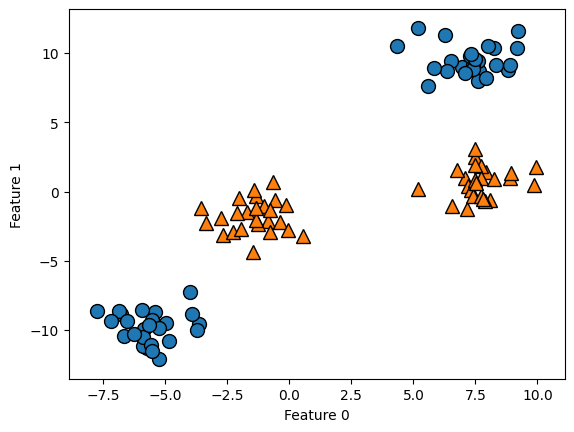

In [14]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import mglearn

# Create a dataset with 4 centers (clusters)
X, y = make_blobs(centers=4, random_state=8)

# Create binary labels (0 and 1) by taking modulo 2
y = y % 2

# Plot the data
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.show()


Now, LinearSVC on Complex Data

Text(0, 0.5, 'Feature 1')

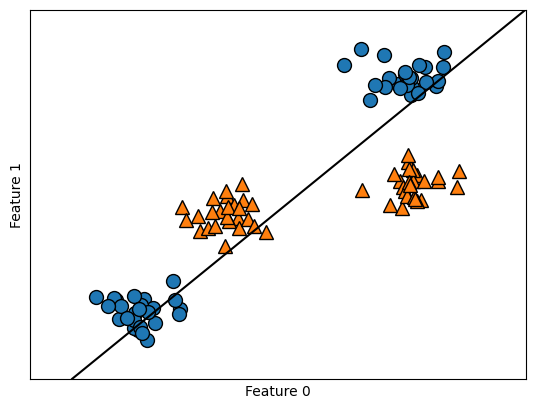

In [15]:
from sklearn.svm import LinearSVC
linear_svm = LinearSVC().fit(X, y)
mglearn.plots.plot_2d_separator(linear_svm, X)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

Add a New Feature to Transform the Data (3D) and Visualize the Transformed Data in 3D



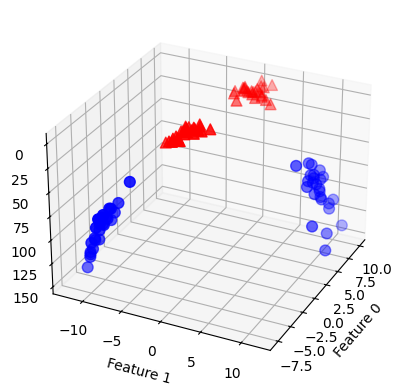

In [18]:

import numpy as np
from mpl_toolkits.mplot3d import Axes3D  # Still needed for 3D plotting


# Add squared second feature
X_new = np.hstack([X, X[:, 1:] ** 2])

# Create figure and 3D axis properly in Colab
figure = plt.figure()
ax = figure.add_subplot(111, projection='3d', elev=-152, azim=-26)

# Create mask for class 0 and class 1
mask = y == 0

# Scatter plot for class 0 (blue dots)
ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2], c='b', s=60)

# Scatter plot for class 1 (red triangles)
ax.scatter(X_new[~mask, 0], X_new[~mask, 1], X_new[~mask, 2], c='r', marker='^', s=60)

# Label the axes
ax.set_xlabel("Feature 0")
ax.set_ylabel("Feature 1")
ax.set_zlabel("Feature 1 ** 2")

# Show the plot
plt.show()


Visualizing the Linear SVM Decision Boundary in 3D with Polynomial Feature Expansion

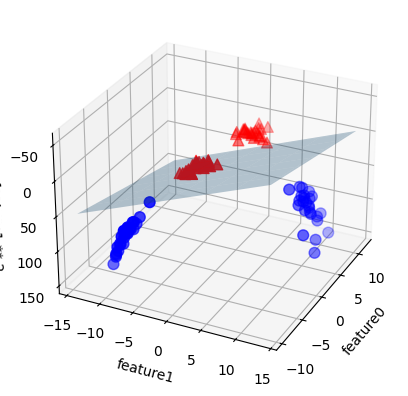

In [21]:
# Fit the linear SVM model on 3D data
linear_svm_3d = LinearSVC().fit(X_new, y)

# Extract coefficients and intercept of the separating plane
coef, intercept = linear_svm_3d.coef_.ravel(), linear_svm_3d.intercept_

# Create a new figure for 3D plotting
figure = plt.figure()

# Create 3D axes in the figure (Colab-compatible way)
ax = figure.add_subplot(111, projection='3d', elev=-152, azim=-26)

# Create grid points over feature0 and feature1 ranges
xx = np.linspace(X_new[:, 0].min() - 2, X_new[:, 0].max() + 2, 50)
yy = np.linspace(X_new[:, 1].min() - 2, X_new[:, 1].max() + 2, 50)
XX, YY = np.meshgrid(xx, yy)

# Calculate corresponding z values for the decision boundary plane
ZZ = (coef[0] * XX + coef[1] * YY + intercept) / -coef[2]

# Plot the decision boundary plane as a translucent surface
ax.plot_surface(XX, YY, ZZ, rstride=8, cstride=8, alpha=0.3)

# Create mask for class 0
mask = y == 0

# Plot class 0 points as blue dots
ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2], c='b', s=60)

# Plot class 1 points as red triangles
ax.scatter(X_new[~mask, 0], X_new[~mask, 1], X_new[~mask, 2], c='r', marker='^', s=60)

# Set axis labels
ax.set_xlabel("feature0")
ax.set_ylabel("feature1")
ax.set_zlabel("feature1 ** 2")

# Show the plot
plt.show()

Projecting a Linear SVM Decision Boundary from 3D Back to 2D for Visualization"

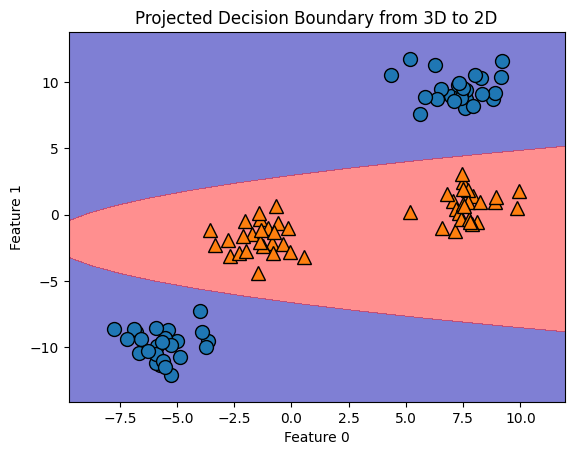

In [22]:
# Step 1: Create the third feature (Z) as the square of feature1 (YY)
ZZ = YY ** 2  # Matches the feature expansion we applied earlier

# Step 2: Use the trained linear SVM to compute the decision function
# This gives a score (distance to the decision boundary) for each grid point
dec = linear_svm_3d.decision_function(
    np.c_[XX.ravel(), YY.ravel(), ZZ.ravel()]  # reshape mesh into long list of 3D points
)

# Step 3: Plot filled contours showing the decision boundary
# This will show where the decision function changes sign (boundary at 0)
plt.contourf(
    XX, YY,
    dec.reshape(XX.shape),  # reshape scores back into grid form
    levels=[dec.min(), 0, dec.max()],  # plot boundary between classes
    cmap=mglearn.cm2,  # use mglearn color map for 2-class problems
    alpha=0.5  # make contour transparent to show scatter points
)

# Step 4: Overlay the original 2D data points
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)

# Step 5: Label axes
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.title("Projected Decision Boundary from 3D to 2D")
plt.show()
